In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/file_practice/movies.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
df['votes'] = df['votes'].fillna(0).astype('int64')
df['budget'] = df['budget'].fillna(0).astype('int64')
df['runtime'] = df['runtime'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')

In [ ]:
df['released'] = df['released'].str.extract(r'^(.*?)(?: \()')[0]
df['released'] = pd.to_datetime(df['released'], format='%B %d, %Y', errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   name      7668 non-null   object        
 1   rating    7591 non-null   object        
 2   genre     7668 non-null   object        
 3   year      7668 non-null   int64         
 4   released  7609 non-null   datetime64[ns]
 5   score     7665 non-null   float64       
 6   votes     7668 non-null   int64         
 7   director  7668 non-null   object        
 8   writer    7665 non-null   object        
 9   star      7667 non-null   object        
 10  country   7665 non-null   object        
 11  budget    7668 non-null   int64         
 12  gross     7668 non-null   int64         
 13  company   7651 non-null   object        
 14  runtime   7668 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(8)
memory usage: 898.7+ KB


In [ ]:
df = df.sort_values(by=['gross'],inplace=False, ascending=False)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['company'].drop_duplicates().sort_values( ascending = False)

,company
7129,thefyzz
5664,micro_scope
6412,iDeal Partners Film Fund
4007,i5 Films
6793,i am OTHER
...,...
3748,1+2 Seisaku Iinkai
3024,.406 Production
7525,"""Weathering With You"" Film Partners"
4345,"""DIA"" Productions GmbH & Co. KG"


<Axes: xlabel='budget', ylabel='gross'>

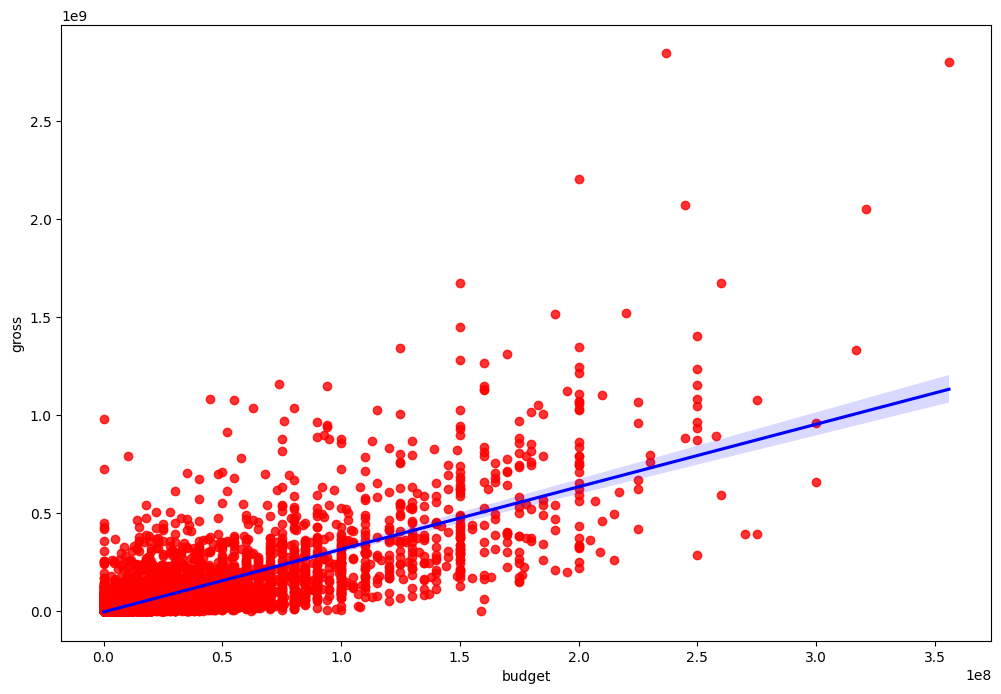

In [ ]:
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws= {'color':'red'}, line_kws = {'color':'blue'})

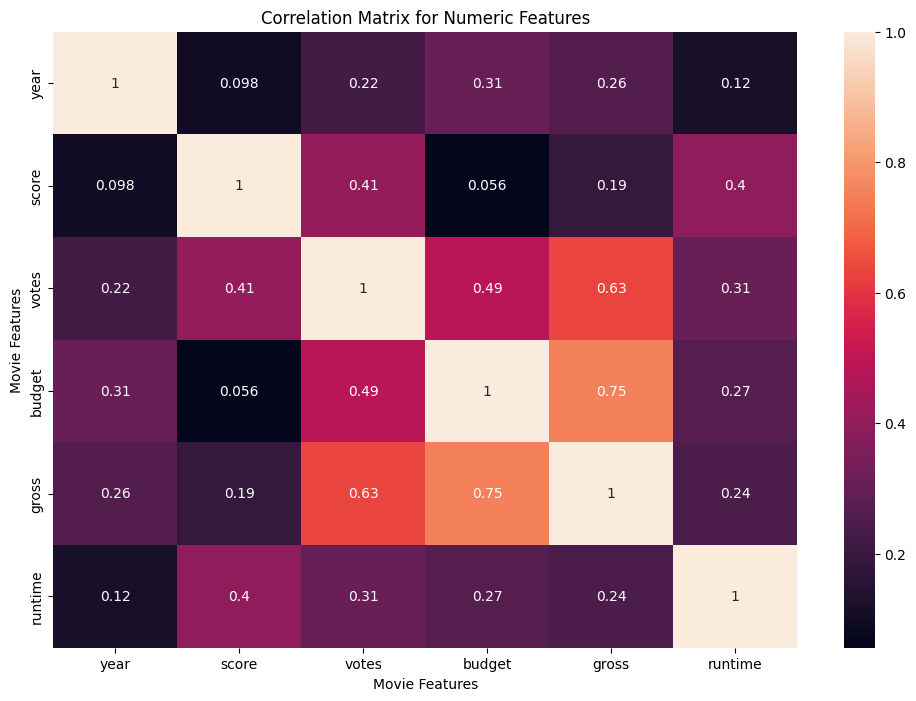

In [ ]:
numeric_df = df.select_dtypes(include = ['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [ ]:
df_numerized = df
for col in df_numerized.columns:
  if(df_numerized[col].dtypes == 'object'):
    df_numerized[col] = df_numerized[col].astype('category')
    df_numerized[col] = df_numerized[col].cat.codes

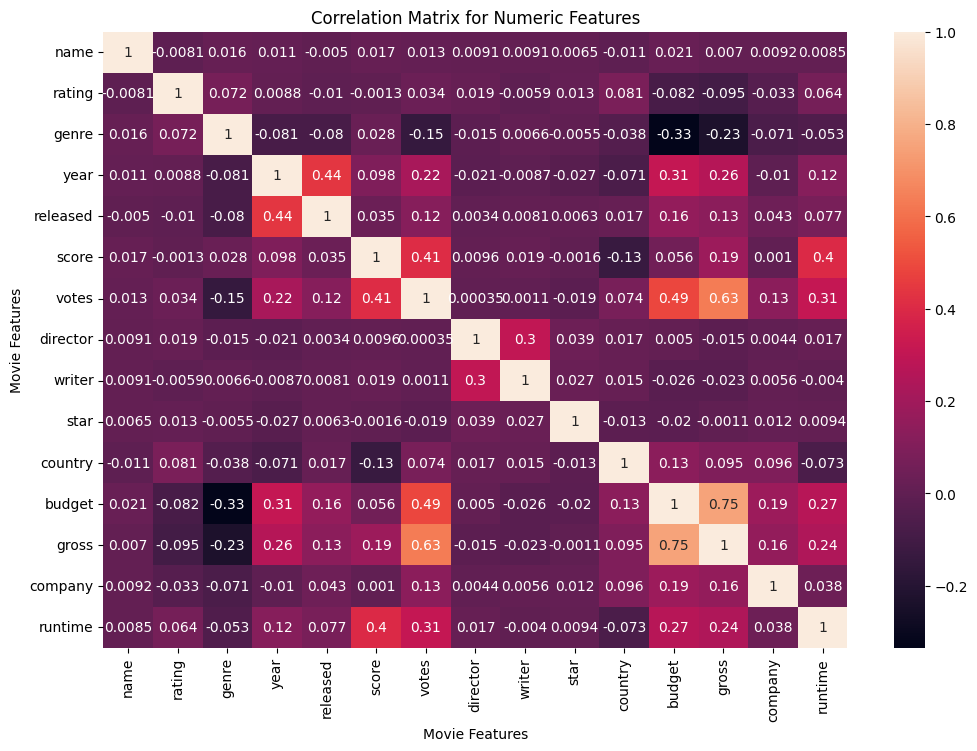

In [ ]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [56]:
correlation_matrix = df_numerized.corr()
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values()
high_correlation = sorted_pairs[(sorted_pairs) > 0.5]
high_correlation

,,0
gross,votes,0.632870
votes,gross,0.632870
budget,gross,0.750157
gross,budget,0.750157
name,name,1.000000
director,director,1.000000
gross,gross,1.000000
budget,budget,1.000000
country,country,1.000000
star,star,1.000000


In [ ]:
# Votes have high correlation with gross (Higher Votes, Higher Gross)
# Budget also have high correlation with gross (Higher Budget, Higher Gross)